In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [5]:
#import csv file
df = pd.read_csv("../data/train.csv")
df.shape

(6500, 20)

In [6]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [7]:
# Data cleaning
##Checking Null values
featurs_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for featur in featurs_with_na:
    print(featur, round(df[featur].isnull().mean()*100,2), '% missing value')

Artist Reputation 11.54 % missing value
Height 5.77 % missing value
Width 8.98 % missing value
Weight 9.03 % missing value
Material 11.75 % missing value
Transport 21.42 % missing value
Remote Location 11.86 % missing value


**The descrption of NaN or Null:**

*It is meant missing values into Data from some reasons or data not available.*
* Missing value completely at Random (MCAR)
* Missing at Random (MAR)
* Missing not at Random (MNAR)

On this datasets it is MCAR there is not reason for missing.


In [8]:
# Check the dupplicate values if any
df.duplicated().sum()

0

In [11]:
target_featur = "Cost"

#defining numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_features.remove(target_featur)
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]

# lets print the columns
print("The {} numerical features with dataset: {}".format(len(numerical_features),numerical_features))
print("\nThe {} categorical features with dataset: {}".format(len(categorical_features), categorical_features))

The 6 numerical features with dataset: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']

The 13 categorical features with dataset: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


In [12]:
#inputing missing values with median to check the multicollinarity for numerical_features
df1 = df.copy()

for i in numerical_features:
    df1[i].fillna(df1[i].median(), inplace=True)


#### Multicollinearity Check

**Variance Inflation Factor (VIP)**
* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.

* Multicollinearity can be deducted using various techinques such as variance inflation Factor (VIF)

In [13]:
import statsmodels.api as sm

for i in range(0, len(numerical_features)):
    x = df1.loc[:, df1.columns == numerical_features[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/ (1 - rsq), 2)
    print(
    "Variance inflation Factor of {} columns is {} \n".format(
    numerical_features[i], vif)
    )

Variance inflation Factor of Artist Reputation columns is 1.01 

Variance inflation Factor of Height columns is 1.01 

Variance inflation Factor of Width columns is 1.02 

Variance inflation Factor of Weight columns is 1.2 

Variance inflation Factor of Price Of Sculpture columns is 1.3 

Variance inflation Factor of Base Shipping Price columns is 1.01 



We can see the VIP status as it is < 5% so these fatures not have multicollinearity

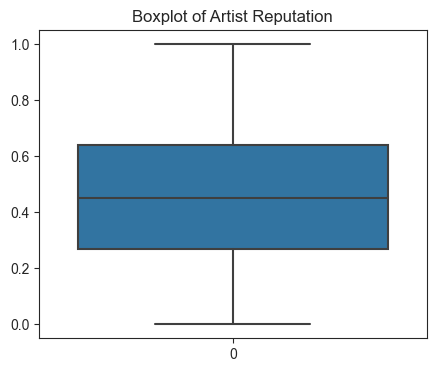

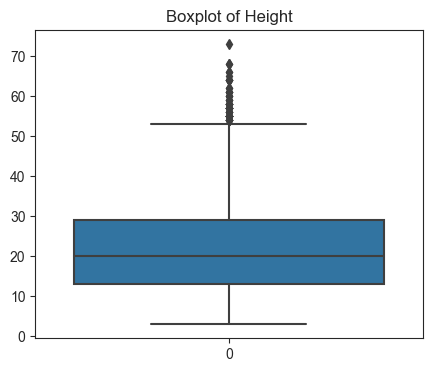

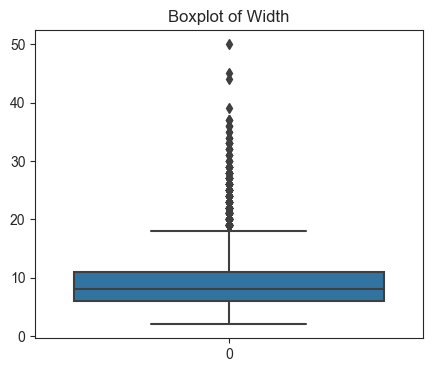

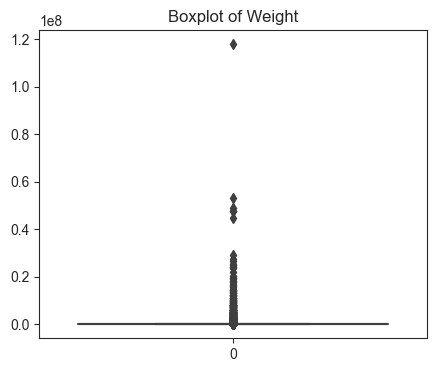

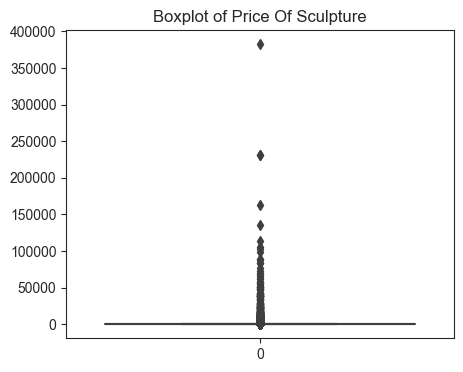

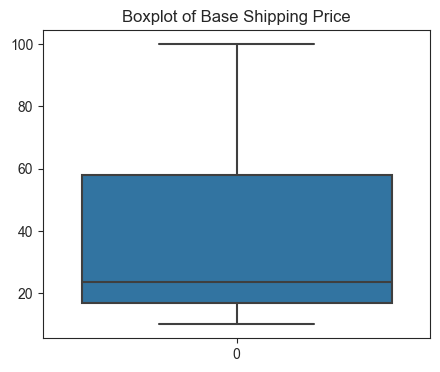

In [45]:
for i in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i])
    ax.set_title(f'Boxplot of {i}')
    plt.show()

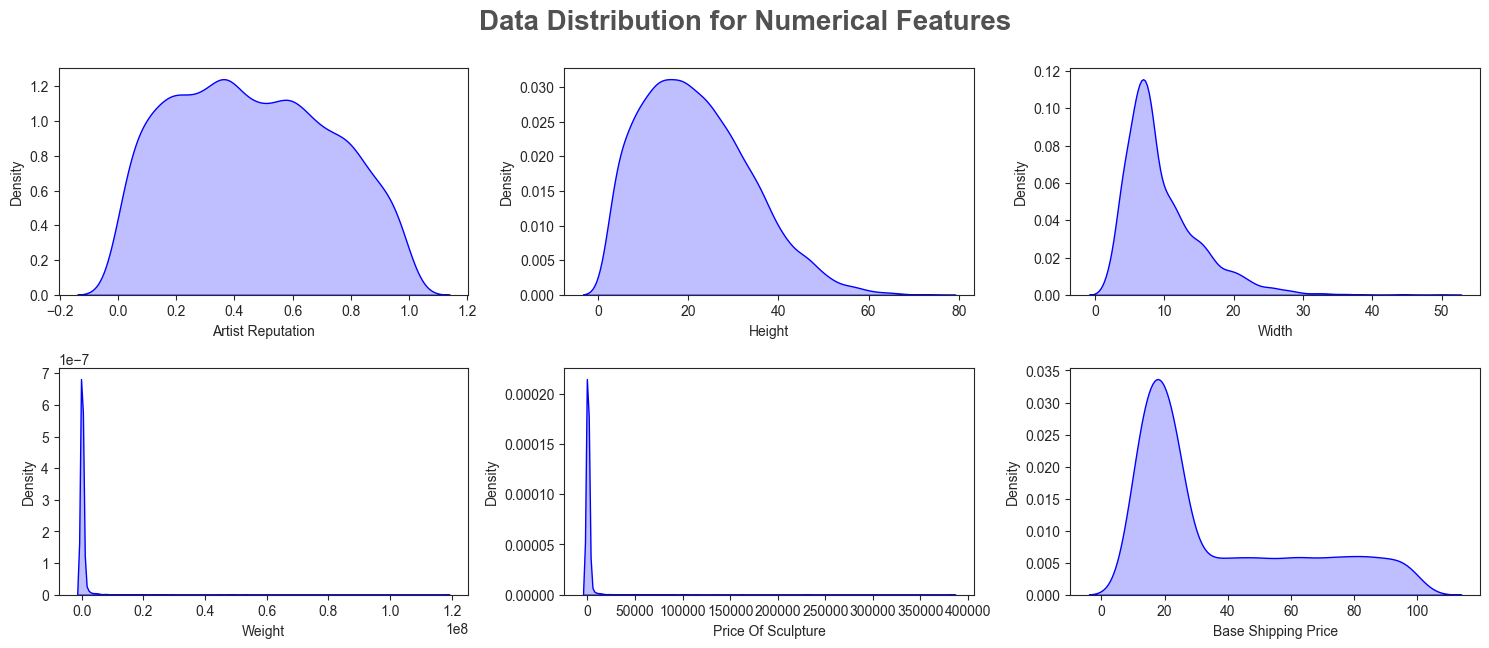

In [46]:
plt.figure(figsize=(15,15))
plt.suptitle("Data Distribution for Numerical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [47]:
df[numerical_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

**Stats:**
* We can see the from above analysis that the `Weight`and`Price Of Sculpture` were extremely positively or left skewed may be becouse outliers. 

* Normal distributed `Artist Reputation`
* The features `Weight` and `Price Of Sculpture` have the Outliers may be, so will take care in Power Transformer of Transformer (sklearn function)

#### Checking the Power transformer on outlier columns

In [14]:
outlier_featur = ["Price Of Sculpture", "Weight"]

In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
outlier_data = df1[outlier_featur]

In [16]:
df1[outlier_featur] = pt.fit_transform(df1[outlier_featur])

In [17]:
outlier_data = pd.DataFrame(outlier_data, columns=outlier_featur) 

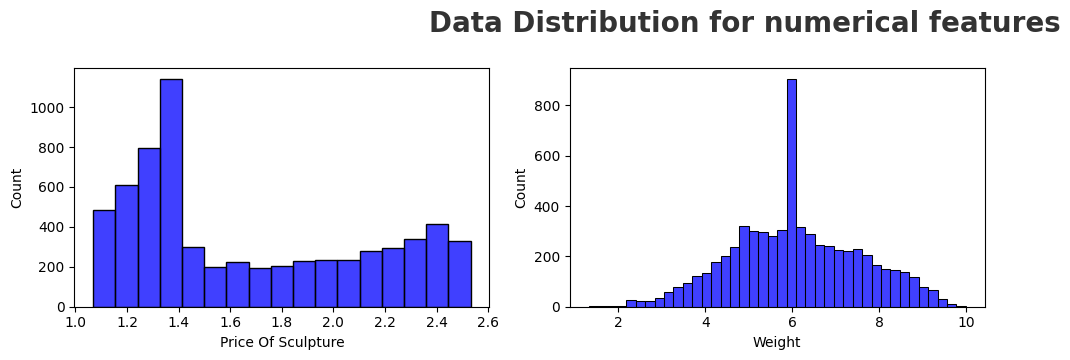

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle("Data Distribution for numerical features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(outlier_featur)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_featur[i]], color='b')
    plt.xlabel(outlier_featur[i])
    plt.tight_layout()

In [19]:
df1[outlier_featur].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

**Stats:**
* Power transformer does a better job at vercoming skewness and handling outliers

*Why Outliers exists in datasets*
* Data entry error (Human Error)
* Measurement error: (Instrument error)
* Natural Error: It willl be real life data
* Internationl Error: Information given wrong

*Impact of Outliers?*
* Outliers can very high impact on few Machine Learning Models
* Can be a cause bise in output

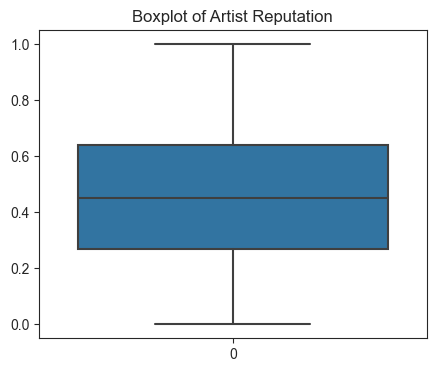

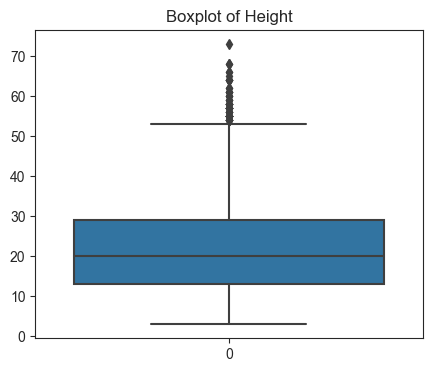

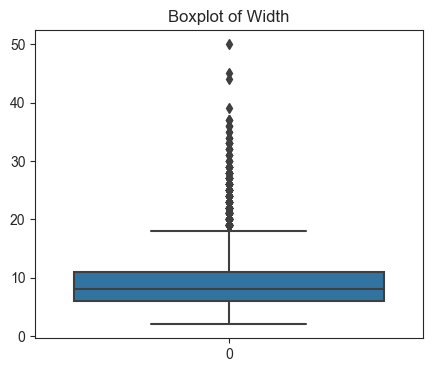

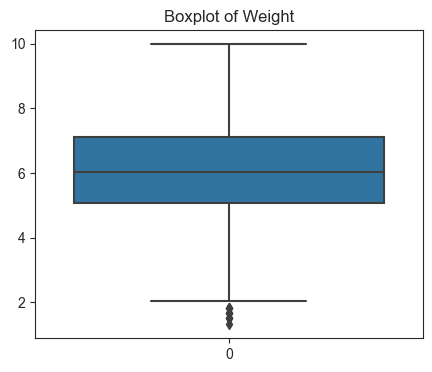

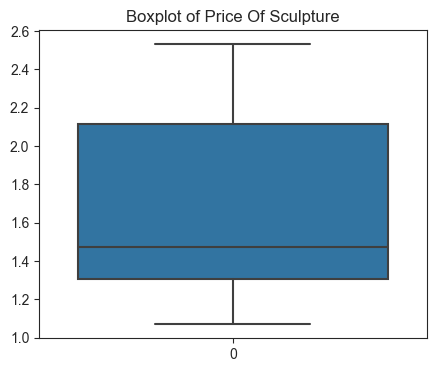

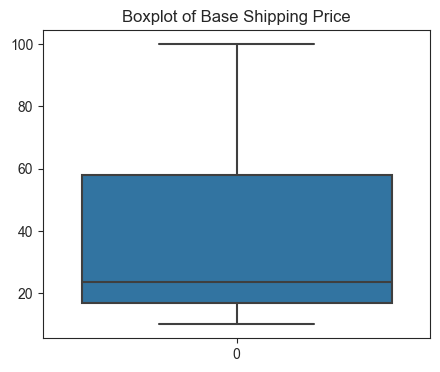

In [20]:
for i in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i])
    ax.set_title(f'Boxplot of {i}')
    plt.show()

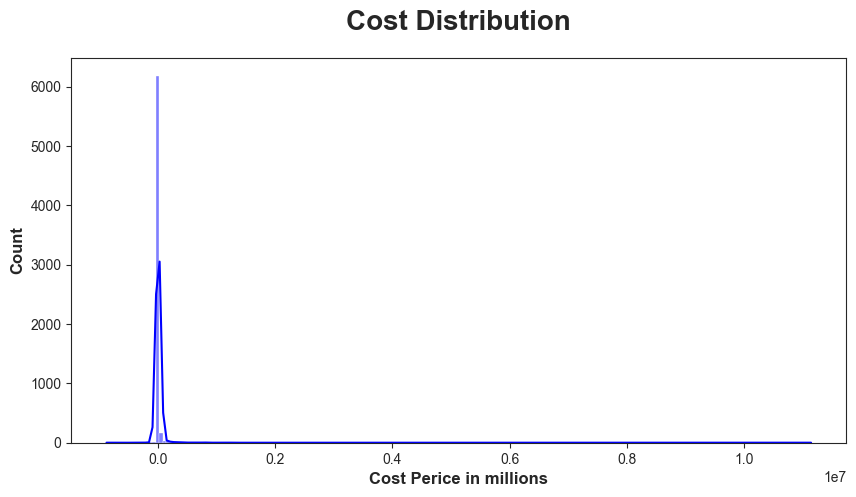

In [21]:
plt.subplots(figsize=(10,5))
sns.histplot(df["Cost"], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost Perice in millions", weight="bold", fontsize=12)
plt.show()

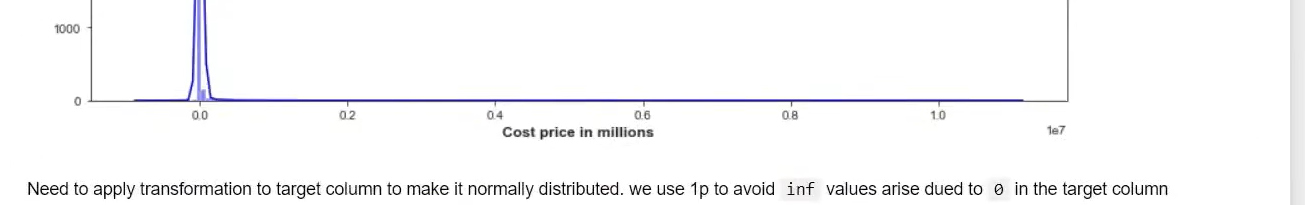

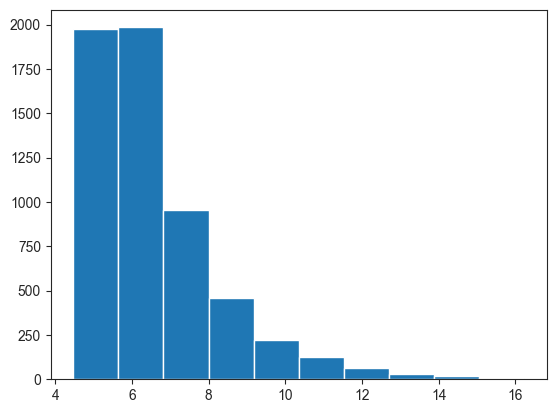

In [22]:
df1["Cost"] = np.log1p(df1["Cost"])
plt.hist(df1["Cost"]);

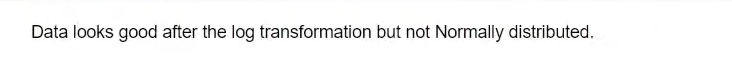

#### Feature creation for Dates columns


In [23]:
# Convert object datatype to datetime
df["Scheduled Date"] = pd.to_datetime(df["Scheduled Date"])
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"])

df["Year"] = pd.DatetimeIndex(df["Scheduled Date"]).year
df["Month"] = pd.DatetimeIndex(df["Scheduled Date"]).month

numerical_features.append("Year")
numerical_features.append("Month")


In [ ]:
# Drop the unneccessary column which are not adding any values in prediction
to_drop_col = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']
df.drop(columns=to_drop_col, inplace=True)

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor

from xgboost import XGBRegressor


### Train Test Split


In [27]:
x = df.drop(columns = ["Cost"], axis=1)
y = np.abs(df["Cost"])
y = np.log1p(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Feature Encoding and Scaling
##### Selecting Numerical and categorical features for feature scaling

In [29]:
numerical_features = [x for x in numerical_features if x not in outlier_featur]
categorical_features = [x for x in categorical_features if x not in to_drop_col]

In [30]:
(numerical_features), (categorical_features), (outlier_featur)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Year',
  'Month'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

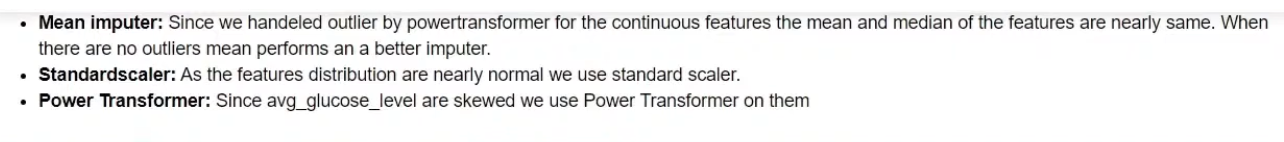

In [31]:
numerical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_features_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder', OneHotEncoder()),
])

outliers_features_pipline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("transformer", PowerTransformer(standardize=True))
])

Preprocessor = ColumnTransformer([
    ("Numeric FeatPures ipeline", numerical_features_pipeline, numerical_features),
    ("Categorical Features Pipeline", categorical_features_pipline, categorical_features),
    ("Outliers Features Pipeline", outliers_features_pipline, outlier_featur)
    
])

In [32]:
X_train = Preprocessor.fit_transform(X_train)
X_test = Preprocessor.transform(X_test)

#### Model Selection

* Here shshould understand the various Regressor models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with Hyper Parameter fine tune

In [33]:
def matrics(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_absolute_error(true, pred))
    r2_square = r2_score(true, pred)
    return mae, mse, rmse, r2_square

In [34]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluate model performance
        train_mse = mean_squared_error(y_train, y_train_pred, squared=False)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_absolute_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred, squared=False)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_absolute_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        
        results.append({
            "Model Name": name,
            "Train MSE": train_mse,
            "Train MAE": train_mae,
            "Train RMSE": train_rmse,
            "Train R2 Score": train_r2,
        
            "Test MSE": test_mse,
            "Test MAE": test_mae,
            "Test RMSE": test_rmse,
            "Test R2 Score": test_r2,
        
        })
        
        print("Model Performance for", name)
        print("Model Peformance for Training set")
        print("- mean_absolute_error (Train): {:.4f}".format(train_mae))
        print("- mean_squared_error (Train): {:.4f}".format(train_mse))
        print("- Root Mean Squared Error (Train): {:.4f}".format(train_rmse))
        print("- R2 Score (Train): {:.4f}".format(train_r2))
        
        print("-----------------------------------------------")
        
        print("Model Peformance for Test set")
        print("- mean_absolute_error (Train): {:.4f}".format(test_mae))
        print("- mean_squared_error (Train): {:.4f}".format(test_mse))            
        print("- Root Mean Squared Error (Test): {:.4f}".format(test_rmse))
        print("- R2 Score (Test): {:.4f}".format(test_r2))
        print("\n")
    
    report = pd.DataFrame(results).sort_values(by="Test R2 Score", ascending=False)
    return report


In [35]:
# Define models
models = {
    
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(max_depth=15),
    "XGB Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(max_depth=5, verbose=True),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}

evaluation_report = evaluate_models(X_train, X_test, y_train, y_test, models)
print(evaluation_report)

Model Performance for Linear Regression
Model Peformance for Training set
- mean_absolute_error (Train): 0.4971
- mean_squared_error (Train): 0.7357
- Root Mean Squared Error (Train): 0.7050
- R2 Score (Train): 0.8014
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.4841
- mean_squared_error (Train): 0.6966
- Root Mean Squared Error (Test): 0.6958
- R2 Score (Test): 0.8218


Model Performance for Random Forest
Model Peformance for Training set
- mean_absolute_error (Train): 0.0792
- mean_squared_error (Train): 0.1235
- Root Mean Squared Error (Train): 0.2814
- R2 Score (Train): 0.9944
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.2071
- mean_squared_error (Train): 0.3514
- Root Mean Squared Error (Test): 0.4550
- R2 Score (Test): 0.9546


Model Performance for K-Neighbors Regressor
Model Peformance for Training set
- mean_absolute_error (Train): 0.3614
- mean_s

217:	learn: 0.2939115	total: 536ms	remaining: 1.92s
218:	learn: 0.2937138	total: 540ms	remaining: 1.93s
219:	learn: 0.2933272	total: 541ms	remaining: 1.92s
220:	learn: 0.2927207	total: 543ms	remaining: 1.91s
221:	learn: 0.2920702	total: 544ms	remaining: 1.91s
222:	learn: 0.2917036	total: 546ms	remaining: 1.9s
223:	learn: 0.2914126	total: 548ms	remaining: 1.9s
224:	learn: 0.2911735	total: 550ms	remaining: 1.89s
225:	learn: 0.2908070	total: 552ms	remaining: 1.89s
226:	learn: 0.2902829	total: 554ms	remaining: 1.89s
227:	learn: 0.2899295	total: 557ms	remaining: 1.89s
228:	learn: 0.2896678	total: 559ms	remaining: 1.88s
229:	learn: 0.2891521	total: 561ms	remaining: 1.88s
230:	learn: 0.2887536	total: 562ms	remaining: 1.87s
231:	learn: 0.2883220	total: 564ms	remaining: 1.87s
232:	learn: 0.2879961	total: 566ms	remaining: 1.86s
233:	learn: 0.2876194	total: 567ms	remaining: 1.86s
234:	learn: 0.2874407	total: 570ms	remaining: 1.86s
235:	learn: 0.2870650	total: 572ms	remaining: 1.85s
236:	learn: 0.

398:	learn: 0.2438225	total: 906ms	remaining: 1.36s
399:	learn: 0.2436372	total: 909ms	remaining: 1.36s
400:	learn: 0.2434397	total: 910ms	remaining: 1.36s
401:	learn: 0.2433268	total: 912ms	remaining: 1.36s
402:	learn: 0.2431972	total: 914ms	remaining: 1.35s
403:	learn: 0.2430978	total: 916ms	remaining: 1.35s
404:	learn: 0.2429187	total: 917ms	remaining: 1.35s
405:	learn: 0.2427698	total: 927ms	remaining: 1.35s
406:	learn: 0.2425621	total: 930ms	remaining: 1.35s
407:	learn: 0.2423769	total: 933ms	remaining: 1.35s
408:	learn: 0.2422035	total: 938ms	remaining: 1.35s
409:	learn: 0.2420646	total: 941ms	remaining: 1.35s
410:	learn: 0.2418765	total: 943ms	remaining: 1.35s
411:	learn: 0.2417179	total: 945ms	remaining: 1.35s
412:	learn: 0.2416354	total: 947ms	remaining: 1.35s
413:	learn: 0.2414845	total: 949ms	remaining: 1.34s
414:	learn: 0.2413267	total: 950ms	remaining: 1.34s
415:	learn: 0.2411792	total: 952ms	remaining: 1.34s
416:	learn: 0.2408763	total: 954ms	remaining: 1.33s
417:	learn: 

609:	learn: 0.2134140	total: 1.3s	remaining: 829ms
610:	learn: 0.2133037	total: 1.3s	remaining: 827ms
611:	learn: 0.2131985	total: 1.3s	remaining: 824ms
612:	learn: 0.2130161	total: 1.3s	remaining: 822ms
613:	learn: 0.2129311	total: 1.3s	remaining: 819ms
614:	learn: 0.2128398	total: 1.3s	remaining: 817ms
615:	learn: 0.2127156	total: 1.31s	remaining: 814ms
616:	learn: 0.2125796	total: 1.31s	remaining: 812ms
617:	learn: 0.2124924	total: 1.31s	remaining: 809ms
618:	learn: 0.2124268	total: 1.31s	remaining: 807ms
619:	learn: 0.2123595	total: 1.31s	remaining: 805ms
620:	learn: 0.2122665	total: 1.31s	remaining: 802ms
621:	learn: 0.2120755	total: 1.32s	remaining: 800ms
622:	learn: 0.2119826	total: 1.32s	remaining: 797ms
623:	learn: 0.2118918	total: 1.32s	remaining: 795ms
624:	learn: 0.2117848	total: 1.32s	remaining: 792ms
625:	learn: 0.2116835	total: 1.32s	remaining: 790ms
626:	learn: 0.2115440	total: 1.32s	remaining: 787ms
627:	learn: 0.2114001	total: 1.32s	remaining: 785ms
628:	learn: 0.2113

834:	learn: 0.1943935	total: 1.66s	remaining: 328ms
835:	learn: 0.1943079	total: 1.66s	remaining: 326ms
836:	learn: 0.1942407	total: 1.67s	remaining: 324ms
837:	learn: 0.1941762	total: 1.67s	remaining: 322ms
838:	learn: 0.1941007	total: 1.67s	remaining: 320ms
839:	learn: 0.1940265	total: 1.67s	remaining: 318ms
840:	learn: 0.1939440	total: 1.67s	remaining: 316ms
841:	learn: 0.1939069	total: 1.67s	remaining: 314ms
842:	learn: 0.1938237	total: 1.68s	remaining: 312ms
843:	learn: 0.1937950	total: 1.68s	remaining: 310ms
844:	learn: 0.1937415	total: 1.68s	remaining: 308ms
845:	learn: 0.1936307	total: 1.68s	remaining: 306ms
846:	learn: 0.1935304	total: 1.68s	remaining: 304ms
847:	learn: 0.1934781	total: 1.68s	remaining: 302ms
848:	learn: 0.1933885	total: 1.69s	remaining: 300ms
849:	learn: 0.1932712	total: 1.69s	remaining: 298ms
850:	learn: 0.1931904	total: 1.69s	remaining: 296ms
851:	learn: 0.1931174	total: 1.69s	remaining: 294ms
852:	learn: 0.1930358	total: 1.69s	remaining: 292ms
853:	learn: 

Model Performance for CatBoosting Regressor
Model Peformance for Training set
- mean_absolute_error (Train): 0.1180
- mean_squared_error (Train): 0.1830
- Root Mean Squared Error (Train): 0.3435
- R2 Score (Train): 0.9877
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.1621
- mean_squared_error (Train): 0.2749
- Root Mean Squared Error (Test): 0.4026
- R2 Score (Test): 0.9722


Model Performance for AdaBoost Regressor
Model Peformance for Training set
- mean_absolute_error (Train): 0.4827
- mean_squared_error (Train): 0.5819
- Root Mean Squared Error (Train): 0.6948
- R2 Score (Train): 0.8758
-----------------------------------------------
Model Peformance for Test set
- mean_absolute_error (Train): 0.4887
- mean_squared_error (Train): 0.6118
- Root Mean Squared Error (Test): 0.6991
- R2 Score (Test): 0.8625


Model Performance for SVR
Model Peformance for Training set
- mean_absolute_error (Train): 0.2297
- mean_squared_er

In [36]:
evaluation_report

,Model Name,Train MSE,Train MAE,Train RMSE,Train R2 Score,Test MSE,Test MAE,Test RMSE,Test R2 Score
5,CatBoosting Regressor,0.182990,0.117984,0.343488,0.987715,0.274947,0.162109,0.402627,0.972231
4,XGB Regressor,0.101866,0.068014,0.260795,0.996193,0.336738,0.188986,0.434725,0.958347
1,Random Forest,0.123521,0.079205,0.281433,0.994402,0.351442,0.207058,0.455037,0.954630
7,SVR,0.469386,0.229666,0.479235,0.919169,0.486570,0.258535,0.508463,0.913033
3,Decision Tree,0.055728,0.020186,0.142077,0.998861,0.525302,0.324146,0.569338,0.898637
6,AdaBoost Regressor,0.581916,0.482699,0.694766,0.875767,0.611836,0.488704,0.699074,0.862491
2,K-Neighbors Regressor,0.567540,0.361359,0.601131,0.881829,0.658831,0.426334,0.652943,0.840555
0,Linear Regression,0.735678,0.497076,0.705036,0.801440,0.696556,0.484115,0.695783,0.821773


### Hyperparameter Tuning
##### Initialize few parameter for Hyperparamter tuning

In [48]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators":[100, 200, 500, 1000] 
             }

xgboost_params = {"learning_rate":[0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators":[100, 200, 300],
                  "colsample_bytree":[0.5, 0.8, 1, 0.3, 0.4]
                 }

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [49]:
# Model list for hyperparameter turning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                  "XGBoost", XGBRegressor(), xgboost_params,
                  "CatBoost", CatBoostRegressor(verbose=True), cat_params]

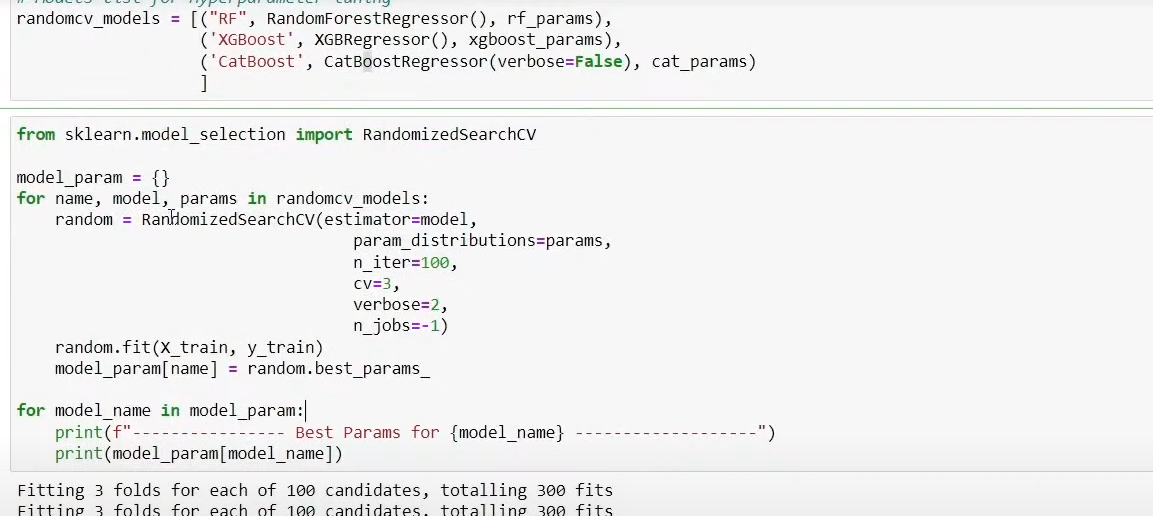

In [50]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1
                               )
    
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"----Best Params for {model_name} -------")
    print(model_params[model_name])
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   9.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   9.3s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   9.1s
[CV] END max_depth=5, max_features=8, min_s

[CV] END max_depth=10, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=  14.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=  14.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=1000; total time=  14.3s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.6s
[CV] END max_dept

[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   1.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   1.3s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, max_f

[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.3s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.3s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=1000; total time=   5.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] 

ValueError: too many values to unpack (expected 3)

In [ ]:
#re-initialized models with best params
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_params["RF"], n_jobs=-1),
    "XGB Regressor": XGBRegressor(**model_params["XGBoost"], n_jobs=-1),
    "CatBoosting Regressor": CatBoostRegressor(**model_params["CatBoost"], verbose=False)
}

grid_model_evaluation = evaluate_models(X_train, X_test, y_train, y_test, models)

In [ ]:
grid_model_evaluation

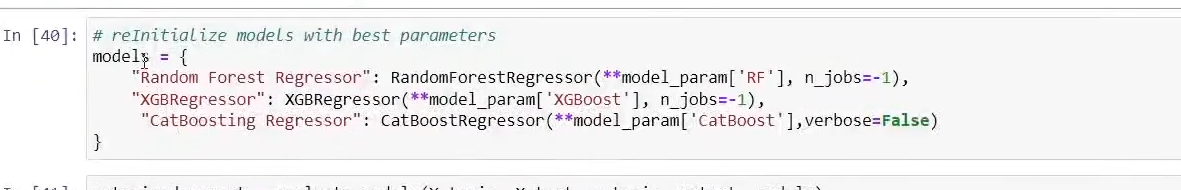